In [87]:
#%watermark -a "Chibuzor Enyioko" -d -t -v -p numpy,pandas,matplotlib

# Project 3: Unsupervised Learning

This project explores unsupervised learning methods through clustering. 

In [88]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn as sk

## Part 1: Cleaning the data sets

In [ ]:
# importing the data sets

mice_data = pd.read_csv('mice.csv')

# selecting numeric columns only and dropping identifier columns for hospital data

mice_data_x = mice_data.select_dtypes(exclude=['object'])

## Part 2: Questions
### Mice Data set

1. Run k-Means on the dataset and identify the best number (between 2 and 8)
of clusters (hint – Silhouette Scores on the right side of the k-Means box). Report this
number and its silhouette score. For non-technical track students – you may see an error
regarding the max number of allowed rows for the Hospital dataset. Report the scores that
you see regardless.


For n_clusters = 2, the average silhouette_score is : 0.26896940125415536
For n_clusters = 3, the average silhouette_score is : 0.2183884939150041
For n_clusters = 4, the average silhouette_score is : 0.22173368220225556
For n_clusters = 5, the average silhouette_score is : 0.23238892329676977
For n_clusters = 6, the average silhouette_score is : 0.23803251872941306
For n_clusters = 7, the average silhouette_score is : 0.2374846548498993
For n_clusters = 8, the average silhouette_score is : 0.21406992223816124


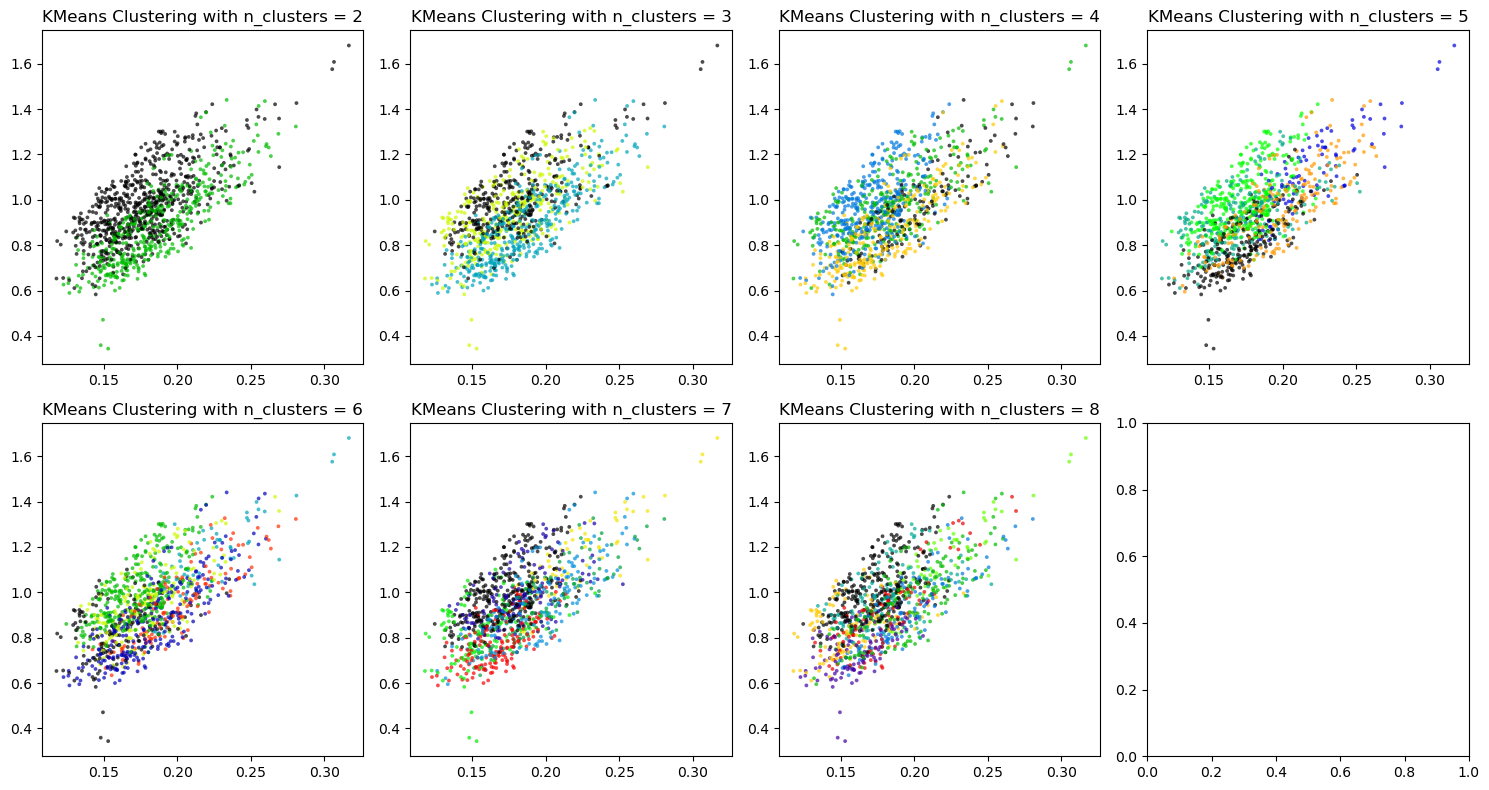

In [90]:
# kmeans clustering on mice data set
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

n_clusters = range(2, 9)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_x)
    silhouette_avg = silhouette_score(mice_data_x, cluster_labels)
    print(f'For n_clusters = {n}, the average silhouette_score is : {silhouette_avg}')

# plot clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, n in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_x)
    
    # scatter plot for all clusters

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    axes[i].scatter(mice_data_x.iloc[:, 0], mice_data_x.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    axes[i].set_title(f'KMeans Clustering with n_clusters = {n}')
plt.tight_layout()
plt.show()

2. Use the best number of clusters and write the silhouette scores for individual
clusters (Manhattan distance). Use k-Means and Silhouette Plot widgets. Do this only for
the mice dataset.


In [91]:
kbest = 2
kmeans = KMeans(n_clusters=kbest)
cluster_labels_best = kmeans.fit_predict(mice_data_x)

centers = kmeans.cluster_centers_
dist_matrix = sk.metrics.pairwise_distances(centers, metric='manhattan')

print("Manhattan distance between the 2 clusters:")
print(dist_matrix[1:, 0])  

Manhattan distance between the 2 clusters:
[2.04191813]


3. Pick the best 5 features by “Information Gain”, and attempt Q1 again. Use the
Rank widget.


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for each feature
mi_scores = mutual_info_classif(mice_data_x, cluster_labels_best)
mi_df = pd.DataFrame({'feature': mice_data_x.columns, 'mi_score': mi_scores})
mi_df = mi_df.sort_values(by='mi_score', ascending=False)
print(mi_df.head(5))

         feature  mi_score
3        pPKCG_N  0.545941
7   AcetylH3K9_N  0.221538
17        IL1B_N  0.107622
27        CaNA_N  0.097678
10         ARC_N  0.097072


For n_clusters = 2, the average silhouette_score is : 0.4220217627893995
For n_clusters = 3, the average silhouette_score is : 0.38192766189787514
For n_clusters = 4, the average silhouette_score is : 0.3987794672536898
For n_clusters = 5, the average silhouette_score is : 0.3644725404700578
For n_clusters = 6, the average silhouette_score is : 0.3972405052416793
For n_clusters = 7, the average silhouette_score is : 0.3690396840122468
For n_clusters = 8, the average silhouette_score is : 0.384607919298764


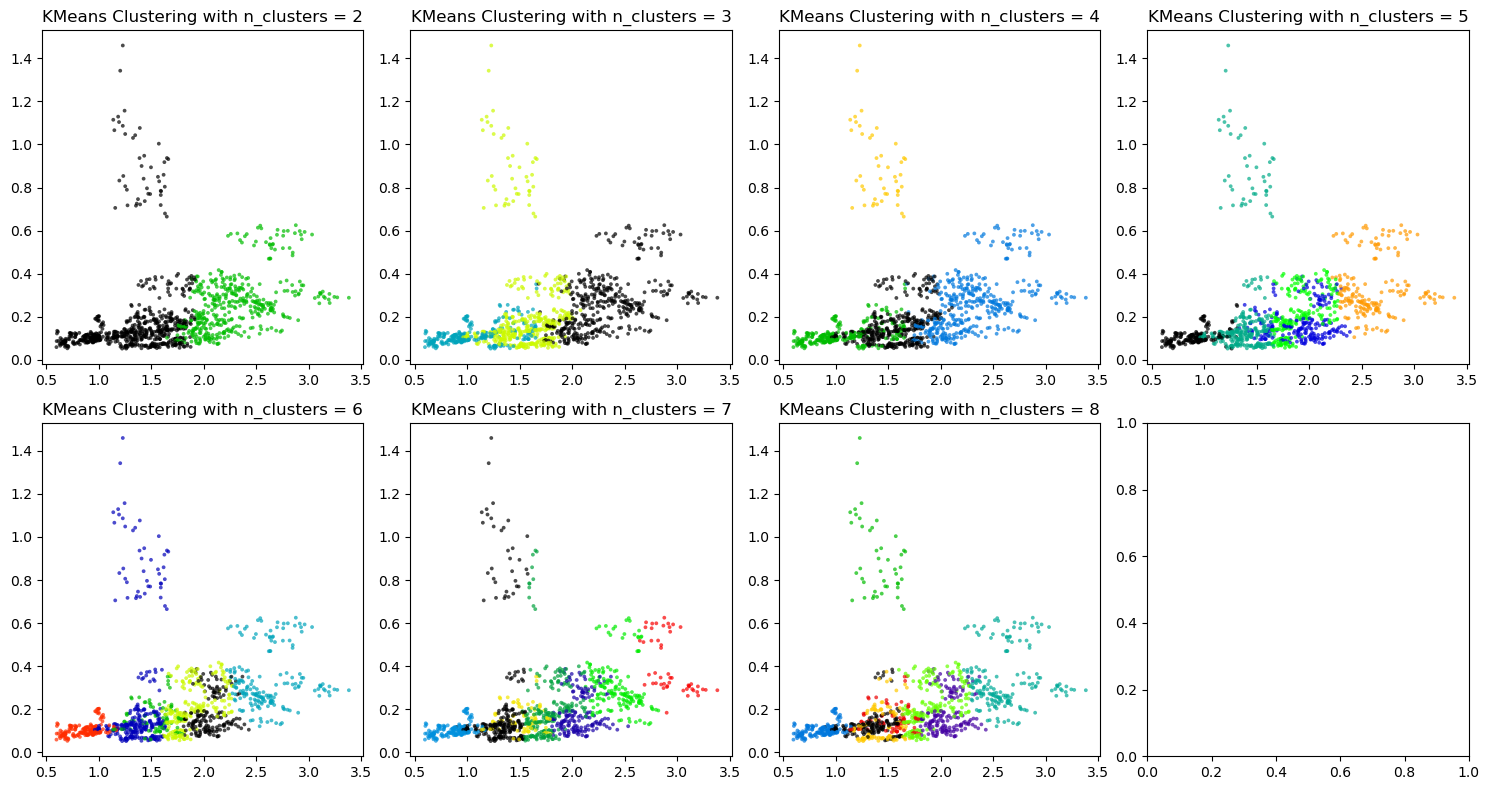

In [ ]:
# selecting the top 5 features based on mutual information scores
mice_data_subset = mice_data[['pPKCG_N', 'AcetylH3K9_N', 'IL1B_N', 'CaNA_N', 'ARC_N']]

# kmeans clustering on mice data subset
n_clusters = range(2, 9)
for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_subset)
    silhouette_avg = silhouette_score(mice_data_subset, cluster_labels)
    print(f'For n_clusters = {n}, the average silhouette_score is : {silhouette_avg}')

# plot clusters
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, n in enumerate(n_clusters):
    kmeans = KMeans(n_clusters=n)
    cluster_labels = kmeans.fit_predict(mice_data_subset)
    
    # scatter plot for all clusters

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    axes[i].scatter(mice_data_subset.iloc[:, 0], mice_data_subset.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    axes[i].set_title(f'KMeans Clustering with n_clusters = {n}')
    
plt.tight_layout()
plt.show()


4. [Extra Credit: 10 points] Try to maximize performance using a supervised method.
Points will be awarded based on the relative rank of students who participate in the extra credit. Include the workbook in your submission.
